- CARICO DI CONDUZIONE ASTINE G10 TRA PIATTO BASE T=4K TO PIATTO CERNOX T=0.3K (dove sono i sensori) 
Per eccesso, sezione come la parte larga

L'integrale di conduzione tra 0.3 K e 4 K è: 0.1378 W/m


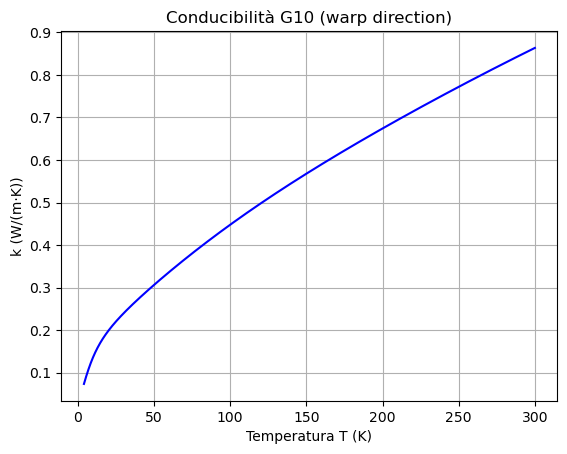

Carico conduzione cilndretti G10: Q = 8.6748e-04 W


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definizone coefficienti per warp direction
a = -2.64827
b = 8.80228
c = -24.8998
d = 41.1625
e = -39.8754
f = 23.1778
g = -7.95635
h = 1.48806
i = -0.11701

# Funzione conducibilità vs Temperatura
def y(T):
    logT = np.log10(T)
    return (10**(a + b*logT + c*logT**2 + d*logT**3 + e*logT**4 + f*logT**5 + g*logT**6 + h*logT**7 + i*logT**8))

 # Funzione per l'integrazione
def integrand(T):
    return y(T)

    

#--------INTEGRALE DI CONDUCIBILITà----------------
# estremi per l'integrazione
T_min = 0.3
T_max = 4

# Controllo se gli estremi sono validi
if T_min < 0 or T_max > 300:
    print("Errore: Gli estremi dell'integrazione devono essere compresi tra 4 K e 300 K.")
else:
# Calcolo dell'integrale solo se gli estremi sono validi
    integral_value, error = quad(integrand, T_min, T_max)
    print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Intervallo di temperatura
T_range = np.linspace(4, 300, 1000)

# Valori di y calcolati
y_values = y(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità G10 (warp direction)')
plt.xlabel('Temperatura T (K)')
plt.ylabel('k (W/(m·K))')
plt.grid(True)
#plt.legend()
plt.show()
#plt.savefig("Carico_conduzione_g10_nist.png")



#--------CARICO CONDUZIONE DA PARAMETRI GEOMETRICI
    # Caratteristiche geometriche cilindretti G10 
diam = 9.6e-3
l = 46e-3 # lunghezza cilindretti
A = np.pi * (diam/2)**2
n = 4 # numero di cilindretti


# Calcolo di Q
Q = A/l * integral_value * n        

# Output del risultato
print(f"Carico conduzione cilndretti G10: Q = {Q:.4e} W")

